--- Optimization Inputs ---
Goal: Maximize Return while Net Beta = 0 and Net Dollar = 0
Risk Constraint: CVaR (95%) <= 2%

--- Optimal Weights ---
QQQ: 37.3%
XLE: -37.4%
BND: -35.7%
GLD: 35.9%


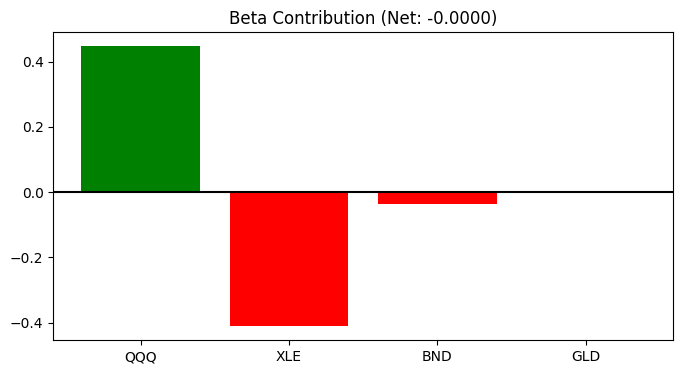

In [1]:
# Cell 1: Setup
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

current_dir = os.getcwd()
if current_dir.endswith("notebooks"):
    sys.path.append(os.path.abspath(os.path.join(current_dir, "..")))
else:
    sys.path.append(current_dir)

from src.optimizer.stochastic_engine import StochasticOptimizer

# Cell 2: Scenario Inputs
# We assume Tech (QQQ) is Bullish and Energy (XLE) is Bearish
tickers = ["QQQ", "XLE", "BND", "GLD"]
betas = {"QQQ": 1.2, "XLE": 1.1, "BND": 0.1, "GLD": 0.0}

scenarios = {
    "QQQ": np.random.normal(0.001, 0.015, 1000),   # +10bps expected
    "XLE": np.random.normal(-0.001, 0.020, 1000),  # -10bps expected
    "BND": np.random.normal(0.000, 0.003, 1000),   # Flat
    "GLD": np.random.normal(0.0005, 0.010, 1000)   # +5bps expected
}

# Cell 3: Solving the MILP
print("--- Optimization Inputs ---")
print(f"Goal: Maximize Return while Net Beta = 0 and Net Dollar = 0")
print(f"Risk Constraint: CVaR (95%) <= 2%")

opt = StochasticOptimizer(tickers, scenarios, betas)
weights = opt.solve(max_positions=4)

print("\n--- Optimal Weights ---")
for t, w in weights.items():
    print(f"{t}: {w:.1%}")

# Cell 4: Validation (Beta Attribution)
# Did we actually achieve neutrality?
contribs = {t: weights.get(t,0) * betas[t] for t in tickers}
plt.figure(figsize=(8, 4))
plt.bar(contribs.keys(), contribs.values(), color=['g' if v>0 else 'r' for v in contribs.values()])
plt.axhline(0, color='black')
plt.title(f"Beta Contribution (Net: {sum(contribs.values()):.4f})")
plt.show()